Column information:

* **Time :** Represents the time elapsed in swconds between the first and the current transaction.
* **V1 to V28 (V-Features) :** Those are the anonymized features generated using Principal Component Analysis(PCA: It is used to reduce the dimentionality and protect sensitive financial information about the transaction)
* **Amount :** The transaction amount in the local currency.
* **Class :** The target variable 0 indicates legitimate transaction and 1 indicates fraudulent transaction

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
print(df.shape)
print(df.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

In [42]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Luckily we don't need to worry about the null values.

In [16]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]

fraud.shape, valid.shape

((492, 31), (284315, 31))

We can see the fraud and valid data is highly imbalanced

In [17]:
print("Amount Details of the fraudulent transactions")
fraud.Amount.describe()

Amount Details of the fraudulent transactions


,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [18]:
print("Amount Details of valid transactions")
valid.Amount.describe()

Amount Details of valid transactions


,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


We can clearly notice from this, the average money transacion for the fraudulent ones is more. This makes the problem crucial to deal with.

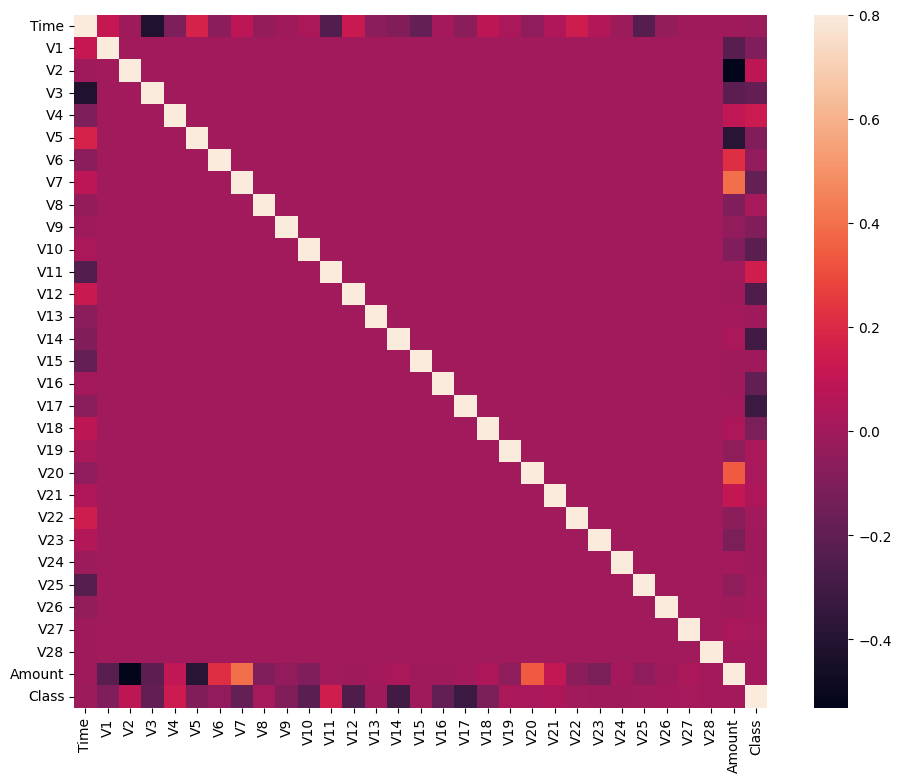

In [22]:
fig = plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), vmax=0.8, square=True)
plt.show()

Here we can observe most of the features do not correlate to other features, but we do have some few columns which are negatively correlated like (V2, Amount) and (Time, V3)

In [23]:
#separating features(x) and Target(y) from the dataset

x = df.drop(['Class'], axis=1)
y = df['Class']

In [24]:
# splitting training and testing data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [26]:
#model building

from sklearn.ensemble import RandomForestClassifier   #importing the model

model = RandomForestClassifier()    # building the model
model.fit(x_train, y_train)     #fitting the mode

RandomForestClassifier()

In [27]:
# model evaluation

y_pred = model.predict(x_test)  #predicting the output of test data

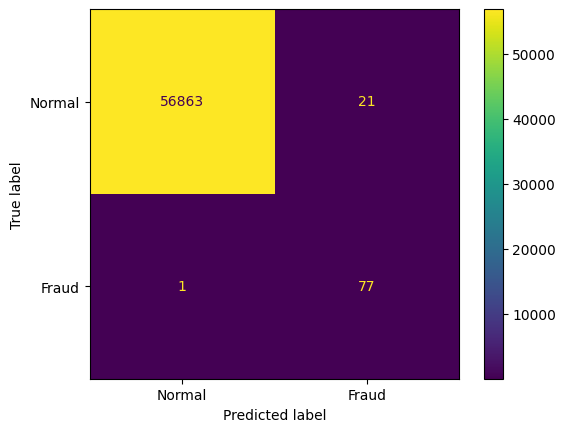

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# print("Confusion Matrix: ", confusion_matrix(y_pred, y_test))
cm = confusion_matrix(y_pred, y_test)
labels = ['Normal','Fraud']
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot()

In [38]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56884
           1       0.79      0.99      0.88        78

    accuracy                           1.00     56962
   macro avg       0.89      0.99      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [41]:
from sklearn.metrics import accuracy_score

print("Accuracy Score : ", accuracy_score(y_pred, y_test)*100)

Accuracy Score :  99.96137776061234


* Previously we saw that our data was highly imbalanced for valid and fraudulent data points yet we see an accuracy score of over 95% so we can conclude that imbalanced data did not have any major effect in the model building process.
* hence after observing all these model evaluation scores, we can say our model is like an excellent model.

Thank you for going through my work till the end, feel free to get in touch if you have any doubts... :)